In [2]:
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages/')
sys.path.append('../')

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import editdistance
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [4]:
import RNA
RAA="UGCA"

In [5]:
from evaluators.Evaluator import Evaluator

Using TensorFlow backend.


In [27]:
from explorers.elitist_explorers import Greedy
from explorers.evolutionary_explorers import WF, ML_WF

In [97]:
greedy_exp= Greedy(recomb_rate=0.2, threshold=0.05, mu=2, virtual_screen=10)
#genetic_exp = ML_WF(recomb_rate=0.1, mu=1, virtual_screen=50 ) 

In [98]:
LANDSCAPE_TYPES ={"RNA": [],"TF":['SIX6_REF_R1']} #This will take very long if not parallelized
#LANDSCAPE_TYPES ={"RNA": [0,1,12,20,25,31],\
                #  "TF": ['POU3F4_REF_R1','PAX3_G48R_R1','SIX6_REF_R1', 'VAX2_REF_R1', 'VSX1_REF_R1']} #for testing


In [99]:
evaluator=Evaluator(greedy_exp,landscape_types=LANDSCAPE_TYPES, path="../simulations/evaluations_test_33/",ML_ensemble=["CNNa","CNNa","RF"])

loading landscapes RNA: [], TF:['SIX6_REF_R1']
1 TF landscapes loaded.
loading complete


In [100]:
#evaluator.evaluate_for_landscapes(evaluator.adaptivity, num_starts=1)

In [102]:
evaluator.evaluate_for_landscapes(evaluator.consistency_robustness_independence, num_starts=1)

In [176]:
data=pd.read_csv("../simulations/evaluations_test_six6/consistency_robustness_independence/Greedy_mu1_tr0.05_r0.1_rho1.csv",index_col=False)
data.head()

,id,batch,sequence,true_score,model_score,batch_size,measurement_cost,virtual_evals,landscape_id,start_id,model_type,virtual_screen,horizon,explorer_type
0,0d5d2846-3e2f-11ea-9140-f218984ddad3,1,TTTTTTTC,0.406589,0.678143,100,101,2000,SIX6_REF_R1,TF0,NAMb_ss0,20,10,Greedy_mu1_tr0.05_r0.1_rho1
1,0d5d2846-3e2f-11ea-9140-f218984ddad3,1,TTTTTTTA,0.483528,0.678143,100,101,2000,SIX6_REF_R1,TF0,NAMb_ss0,20,10,Greedy_mu1_tr0.05_r0.1_rho1
2,0d5d2846-3e2f-11ea-9140-f218984ddad3,1,TTTTTTGA,0.519039,0.678143,100,101,2000,SIX6_REF_R1,TF0,NAMb_ss0,20,10,Greedy_mu1_tr0.05_r0.1_rho1
3,0d5d2846-3e2f-11ea-9140-f218984ddad3,1,TTTTTTCA,0.494021,0.678143,100,101,2000,SIX6_REF_R1,TF0,NAMb_ss0,20,10,Greedy_mu1_tr0.05_r0.1_rho1
4,0d5d2846-3e2f-11ea-9140-f218984ddad3,1,TTTTTTAT,0.501330,0.678143,100,101,2000,SIX6_REF_R1,TF0,NAMb_ss0,20,10,Greedy_mu1_tr0.05_r0.1_rho1


In [177]:
data.id.unique()

array(['0d5d2846-3e2f-11ea-9140-f218984ddad3'], dtype=object)

In [29]:
data.landscape_id.unique()

array(['B1L14RNA1'], dtype=object)

In [183]:
sub_data=data#[data.model_type=="nn_arch=CNNa_hd100_f50"]

In [185]:
sub_data.head()

,id,batch,sequence,true_score,model_score,batch_size,measurement_cost,virtual_evals,landscape_id,start_id,model_type,virtual_screen,horizon,explorer_type
0,0d5d2846-3e2f-11ea-9140-f218984ddad3,1,TTTTTTTC,0.406589,0.678143,100,101,2000,SIX6_REF_R1,TF0,NAMb_ss0,20,10,Greedy_mu1_tr0.05_r0.1_rho1
1,0d5d2846-3e2f-11ea-9140-f218984ddad3,1,TTTTTTTA,0.483528,0.678143,100,101,2000,SIX6_REF_R1,TF0,NAMb_ss0,20,10,Greedy_mu1_tr0.05_r0.1_rho1
2,0d5d2846-3e2f-11ea-9140-f218984ddad3,1,TTTTTTGA,0.519039,0.678143,100,101,2000,SIX6_REF_R1,TF0,NAMb_ss0,20,10,Greedy_mu1_tr0.05_r0.1_rho1
3,0d5d2846-3e2f-11ea-9140-f218984ddad3,1,TTTTTTCA,0.494021,0.678143,100,101,2000,SIX6_REF_R1,TF0,NAMb_ss0,20,10,Greedy_mu1_tr0.05_r0.1_rho1
4,0d5d2846-3e2f-11ea-9140-f218984ddad3,1,TTTTTTAT,0.501330,0.678143,100,101,2000,SIX6_REF_R1,TF0,NAMb_ss0,20,10,Greedy_mu1_tr0.05_r0.1_rho1


In [186]:
sub_data[["true_score","model_score"]].corr("pearson")

,true_score,model_score
true_score,1.000000,-0.108419
model_score,-0.108419,1.000000


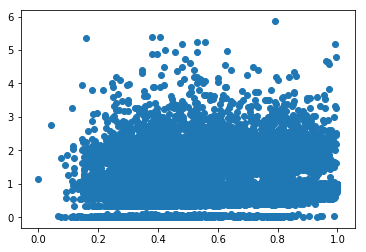

In [187]:
plt.scatter(sub_data["true_score"],sub_data["model_score"])

/anaconda3/envs/tf3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


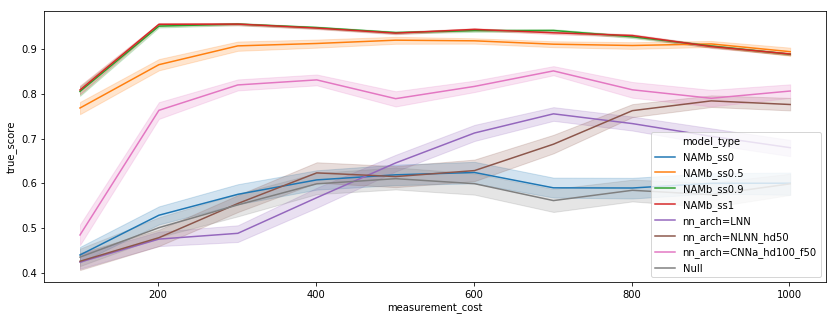

In [189]:
plt.figure(figsize=(14,5))
sns.lineplot(x="measurement_cost",y="true_score",hue="model_type",data=sub_data)

In [82]:
data["start_id"].unique()

array(['startRNAL14_0', 'startRNAL14_1', 'startRNAL14_2'], dtype=object)

In [83]:
import timeit

In [ ]:
def get_top_sequence_per_batch(data):
    top_per_batch=[]
    for i in data.batch.unique():
        sub_data=data[data.batch==i] #must also group by model type and landscape id
        #print (sub_data.true_score.max())
        top_per_batch.append(sub_data.true_score.max())
    return (top_per_batch)

In [163]:
type("st")==str

True

In [281]:
from sklearn.metrics import explained_variance_score, r2_score


/anaconda3/envs/tf3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [292]:
explained_variance_score([1],[1])

1.0

In [ ]:
[]==True

In [ ]:
print 1